<a href="https://colab.research.google.com/github/FelipeM0reira/analise_vitrine_da_moda/blob/main/analise_vitrine_da_moda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [145]:
# Carregar dados
vendas = pd.read_csv('vendas.csv', encoding='latin-1', sep=';')
estoque = pd.read_csv('estoque.csv', encoding='latin-1', sep=';')

In [146]:
# Verificar as primeiras linhas dos DataFrames
print(vendas.head())
print(estoque.head())

         Data          Marca        Produto Genero        Preco  Quantidade  \
0  31/08/2023         Adidas  Calça legging      F   R$ 131,94            2   
1  31/08/2023        DiPaula  Calça legging      F    R$ 35,90            3   
2  31/08/2023        DiPaula  Calça legging      F    R$ 35,90            3   
3  31/08/2023  Extra Fitness  Calça legging      F    R$ 29,90            1   
4  31/08/2023  Extra Fitness  Calça legging      F    R$ 29,90            2   

         Total  
0   R$ 263,88   
1   R$ 107,70   
2   R$ 107,70   
3    R$ 29,90   
4    R$ 59,80   
          Marca  Produto Genero  Estoque
0        Adidas  Vestido      F       16
1        Adidas   Camisa      F       34
2        Adidas    Calça      F       15
3        Adidas  Vestido      F       46
4  Moda Fitness    Calça      M       14


In [147]:
# Verificar informações gerais
print(vendas.info())
print(estoque.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2085 entries, 0 to 2084
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Data        2085 non-null   object
 1   Marca       2085 non-null   object
 2   Produto     2085 non-null   object
 3   Genero      2085 non-null   object
 4   Preco       2085 non-null   object
 5   Quantidade  2085 non-null   int64 
 6   Total       2085 non-null   object
dtypes: int64(1), object(6)
memory usage: 114.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Marca    40 non-null     object
 1   Produto  40 non-null     object
 2   Genero   40 non-null     object
 3   Estoque  40 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 1.4+ KB
None


In [148]:
# Verificar a presença de valores nulos
print(vendas.isnull().sum())
print(estoque.isnull().sum())

Data          0
Marca         0
Produto       0
Genero        0
Preco         0
Quantidade    0
Total         0
dtype: int64
Marca      0
Produto    0
Genero     0
Estoque    0
dtype: int64


In [149]:
# Vendas totais por marca e produto
vendas_totais = vendas.groupby(['Marca', 'Produto']).agg({'Total': 'sum'}).reset_index()
print(vendas_totais)

             Marca           Produto  \
0           Adidas             Calça   
1           Adidas     Calça Esporte   
2           Adidas     Calça legging   
3           Adidas            Camisa   
4           Adidas     Camisa Regata   
..             ...               ...   
68  Sukira Fitness     Camisa Regata   
69  Sukira Fitness  Macacão Academia   
70  Sukira Fitness              Saia   
71  Sukira Fitness           Shorts    
72  Sukira Fitness           Vestido   

                                                Total  
0    R$ 899,97  R$ 99,90  R$ 599,98  R$ 99,90  R$ ...  
1    R$ 210,00  R$ 70,00  R$ 140,00  R$ 210,00  R$...  
2                               R$ 263,88  R$ 395,82   
3    R$ 520,00  R$ 780,00  R$ 780,00  R$ 780,00  R...  
4    R$ 139,90  R$ 139,90  R$ 139,90  R$ 479,70  R...  
..                                                ...  
68   R$ 216,00  R$ 144,00  R$ 68,00  R$ 68,00  R$ ...  
69   R$ 176,00  R$ 176,00  R$ 88,00  R$ 88,00  R$ ...  
70   R$ 99,80  

In [173]:
vendas['Data'] = pd.to_datetime(vendas['Data'])
vendas['Quantidade'] = vendas['Quantidade'].astype(int)
estoque['Estoque'] = estoque['Estoque'].astype(int)

In [201]:
# Vendas totais por mês
vendas['AnoMes'] = vendas['Data'].dt.to_period('M')
vendas_mensais = vendas.groupby('AnoMes').agg({'Total': 'sum'}).reset_index()
print(vendas_mensais)

     AnoMes                                              Total
0   2023-08   R$ 263,88  R$ 107,70  R$ 107,70  R$ 29,90  R$...
1   2023-09   R$ 395,82  R$ 71,80  R$ 71,80  R$ 71,80  R$ 5...
2   2023-10   R$ 107,70  R$ 71,80  R$ 89,70  R$ 89,70  R$ 3...
3   2023-11   R$ 35,90  R$ 59,80  R$ 59,80  R$ 116,70  R$ 7...
4   2023-12   R$ 89,70  R$ 116,70  R$ 38,90  R$ 90,00  R$ 9...
5   2024-01   R$ 71,80  R$ 107,70  R$ 107,70  R$ 77,80  R$ ...
6   2024-02   R$ 107,70  R$ 35,90  R$ 71,80  R$ 107,70  R$ ...
7   2024-03   R$ 71,80  R$ 59,80  R$ 89,70  R$ 29,90  R$ 29...
8   2024-04   R$ 35,90  R$ 35,90  R$ 107,70  R$ 29,90  R$ 5...
9   2024-05   R$ 71,80  R$ 71,80  R$ 107,70  R$ 89,70  R$ 5...
10  2024-06   R$ 107,70  R$ 35,90  R$ 29,90  R$ 59,80  R$ 7...
11  2024-07   R$ 107,70  R$ 71,80  R$ 59,80  R$ 59,80  R$ 3...


In [159]:
print(estoque.groupby(['Marca', 'Produto', 'Genero']).agg({'Estoque': 'sum'}).reset_index())

                  Marca          Produto Genero  Estoque
0                Adidas            Calça      F       15
1                Adidas           Camisa      F       34
2                Adidas          Vestido      F       62
3              D. Paula           Camisa      F       27
4              D. Paula           Camisa      M       36
5              D. Paula             Saia      F       14
6              D. Paula           Shorts      F       13
7         Extra Fitness            Calça      F       46
8         Extra Fitness            Calça      M       15
9         Extra Fitness           Camisa      F       20
10        Extra Fitness             Saia      F       33
11              Lá Rose           Camisa      F       44
12              Lá Rose           Camisa      M       33
13              Lá Rose             Saia      F       28
14              Lá Rose           Shorts      F       34
15              Lá Rose          Vestido      F       40
16           MF Fitness        

In [160]:
# Juntar as tabelas para comparação
dados_completos = pd.merge(vendas, estoque, on=['Marca', 'Produto', 'Genero'], how='left')
print(dados_completos.head())

        Data          Marca        Produto Genero        Preco  Quantidade  \
0 2023-08-31         Adidas  Calça legging      F   R$ 131,94            2   
1 2023-08-31        DiPaula  Calça legging      F    R$ 35,90            3   
2 2023-08-31        DiPaula  Calça legging      F    R$ 35,90            3   
3 2023-08-31  Extra Fitness  Calça legging      F    R$ 29,90            1   
4 2023-08-31  Extra Fitness  Calça legging      F    R$ 29,90            2   

         Total   AnoMes  Estoque  
0   R$ 263,88   2023-08      NaN  
1   R$ 107,70   2023-08      NaN  
2   R$ 107,70   2023-08      NaN  
3    R$ 29,90   2023-08      NaN  
4    R$ 59,80   2023-08      NaN  


In [183]:
# Verificar se há produtos com estoque baixo
dados_completos['EstoqueBaixo'] = dados_completos['Estoque'] < dados_completos['Quantidade']
estoque_baixo = dados_completos[dados_completos['EstoqueBaixo']]
print(estoque_baixo[['Marca', 'Produto', 'Estoque', 'Quantidade']])

Empty DataFrame
Columns: [Marca, Produto, Estoque, Quantidade]
Index: []


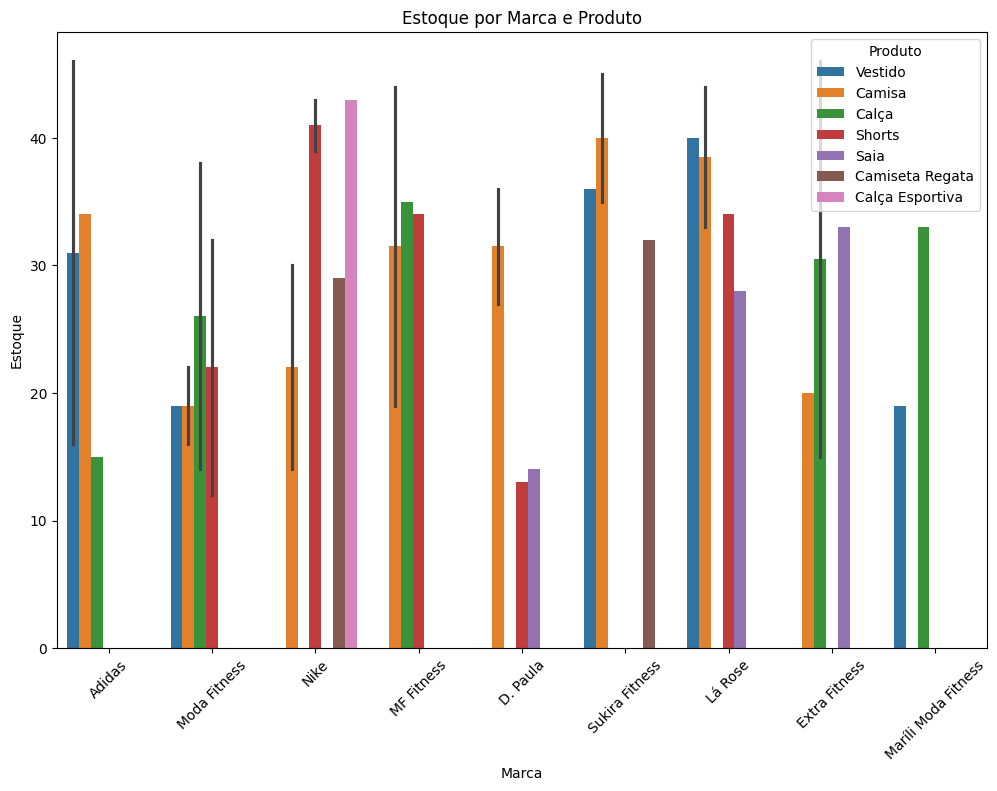

In [182]:
# Estoque por Marca e Produto
plt.figure(figsize=(12, 8))
sns.barplot(data=estoque, x='Marca', y='Estoque', hue='Produto')
plt.title('Estoque por Marca e Produto')
plt.xlabel('Marca')
plt.ylabel('Estoque')
plt.xticks(rotation=45)
plt.show()

In [234]:
print(vendas_mensais.dtypes)
print(vendas.dtypes)

object
Data          datetime64[ns]
Marca                 object
Produto               object
Genero                object
Preco                 object
Quantidade             int64
Total                 object
AnoMes             period[M]
dtype: object


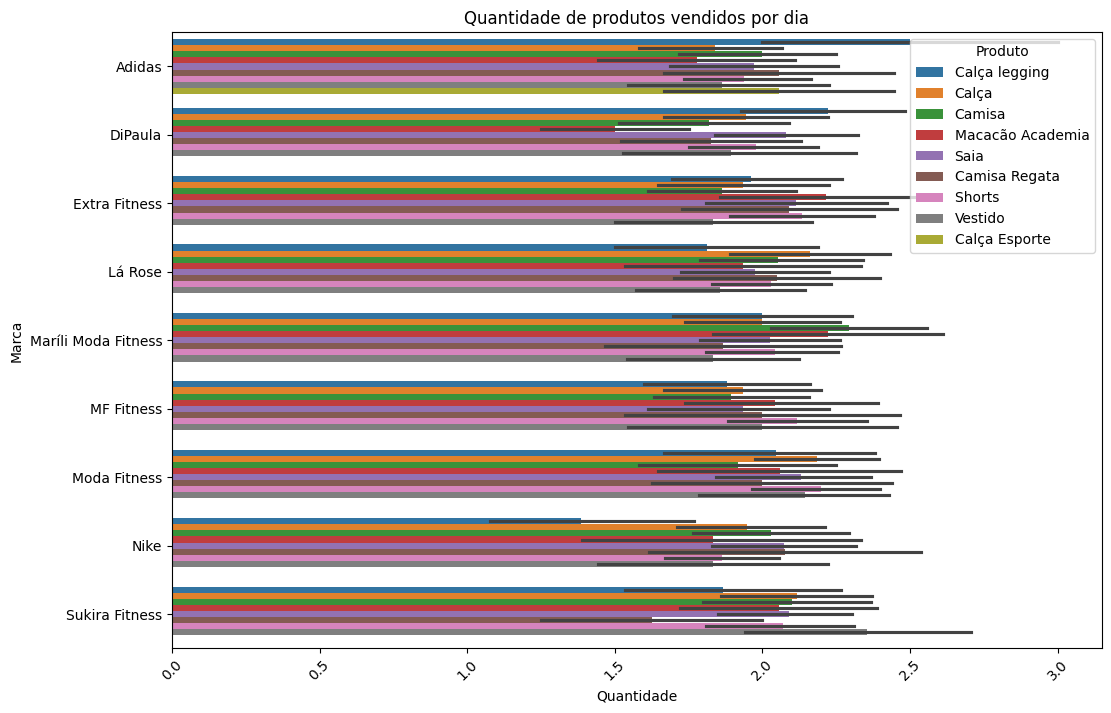

In [251]:
# Quantidade de produtos vendidos
plt.figure(figsize=(12, 8))
sns.barplot(data=vendas, x='Quantidade', y='Marca', hue='Produto')
plt.title('Quantidade de produtos vendidos por dia')
plt.ylabel('Marca')
plt.xlabel('Quantidade')
plt.xticks(rotation=45)
plt.show()

In [257]:
def limpar_valor(valor):
    if isinstance(valor, str):
        valor = valor.replace('R$', '').replace('.', '').replace(',', '.').strip()
        return float(valor)
    return valor

# Aplicar a função à coluna 'Total'
vendas['Total'] = vendas['Total'].apply(limpar_valor)

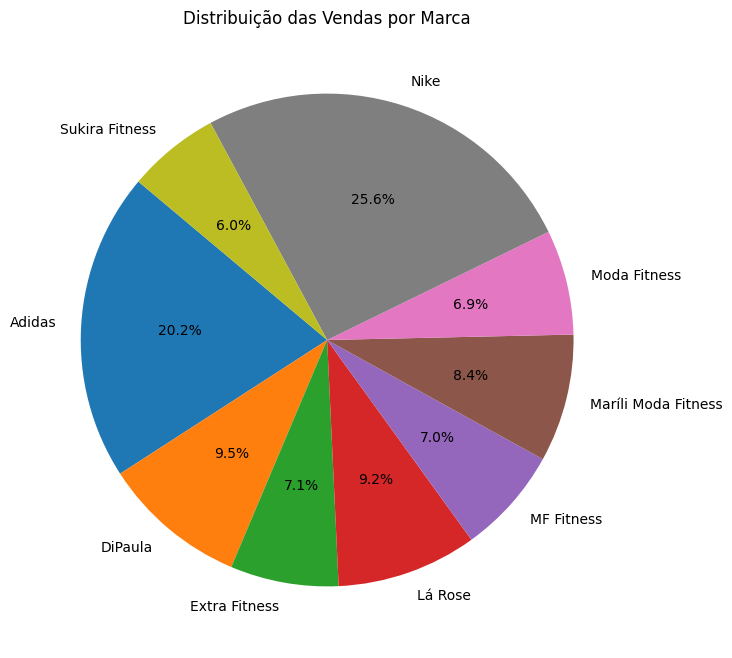

In [258]:
# Total de vendas por marca
vendas_por_marca = vendas.groupby('Marca').agg({'Total': 'sum'}).reset_index()

plt.figure(figsize=(10, 8))
plt.pie(vendas_por_marca['Total'], labels=vendas_por_marca['Marca'], autopct='%1.1f%%', startangle=140)
plt.title('Distribuição das Vendas por Marca')
plt.show()

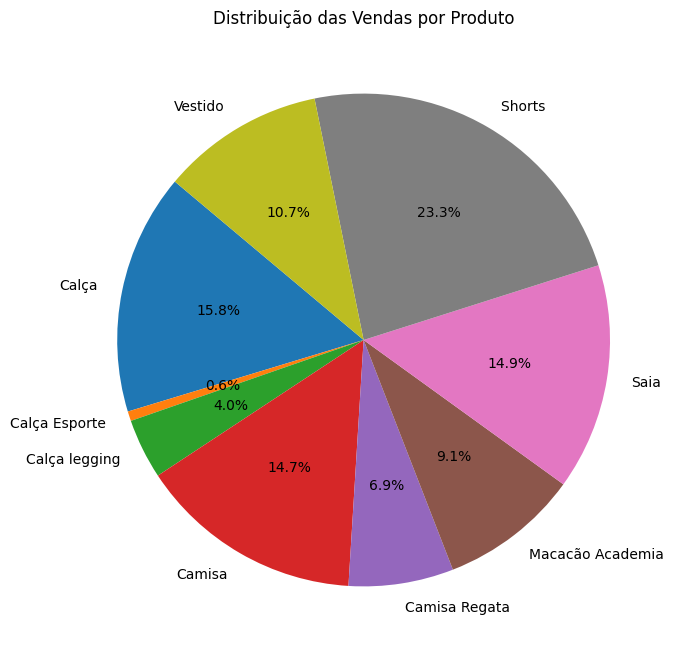

In [259]:
# Total de vendas por produto
vendas_por_produto = vendas.groupby('Produto').agg({'Total': 'sum'}).reset_index()

plt.figure(figsize=(10, 8))
plt.pie(vendas_por_produto['Total'], labels=vendas_por_produto['Produto'], autopct='%1.1f%%', startangle=140)
plt.title('Distribuição das Vendas por Produto')
plt.show()

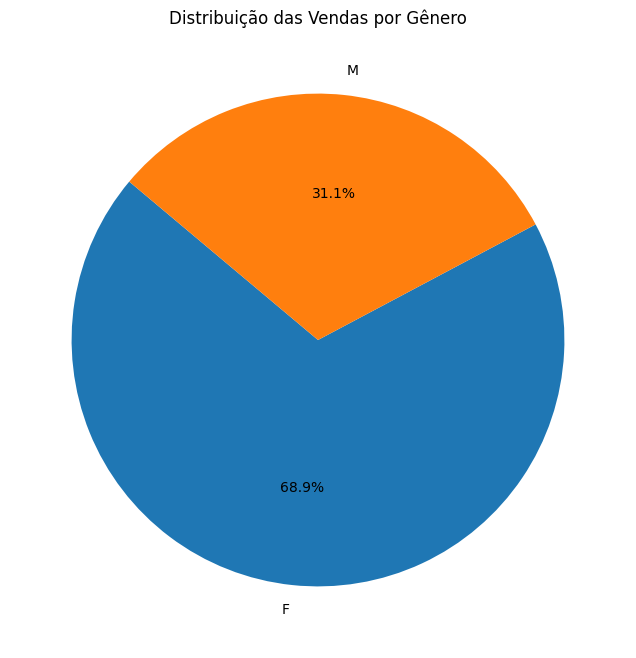

In [261]:
# Total de vendas por gênero
vendas_por_genero = vendas.groupby('Genero').agg({'Total': 'sum'}).reset_index()

plt.figure(figsize=(10, 8))
plt.pie(vendas_por_genero['Total'], labels=vendas_por_genero['Genero'], autopct='%1.1f%%', startangle=140)
plt.title('Distribuição das Vendas por Gênero')
plt.show()